In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

1. In which domains (and sub-domains) are children performing highest and lowest?

8. Is there any notable pattern of scoring by evaluator?

In [3]:
teis_df = pd.read_excel(r'\Users\kesha\Documents\nss_da10\projects\teis-concatahoula_leopards\data\teis_data.xlsx')

In [4]:
teis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23947 entries, 0 to 23946
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


This cell above was to see how many rows that were in the dataset.

In [5]:
teis_df.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
teis_df.describe()

,Date of Birth,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive T-Score,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional T-Score,Communication Sum of Scaled Scores,Communication Developmental Quotient,Communication T-Score,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
count,19500,19493.000000,19493.000000,19493.000000,19483.000000,19483.000000,19483.000000,19469.0000,19469.000000,19469.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2021-08-26 01:54:18.830769152,11.412712,87.435079,41.624583,22.381153,94.470051,46.314428,13.2015,79.604499,36.4030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-10-15 00:00:00,1.000000,46.000000,14.000000,2.000000,46.000000,14.000000,2.0000,46.000000,14.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020-12-11 00:00:00,7.000000,76.000000,34.000000,17.000000,84.000000,39.000000,8.0000,64.000000,26.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-07-21 00:00:00,11.000000,88.000000,42.000000,22.000000,96.000000,47.000000,13.0000,79.000000,36.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-04-12 00:00:00,15.000000,100.000000,50.000000,28.000000,106.000000,54.000000,18.0000,94.000000,46.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-10-30 00:00:00,36.000000,148.000000,82.000000,53.000000,154.000000,86.000000,38.0000,154.000000,86.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.822943,17.438731,11.612715,7.519204,16.695712,11.132555,6.7228,20.168400,13.4456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


just poking around to see how the columns would appear in python through excel. python seeming to kick out null values past a certain point of columns... too much data ??

In [10]:
teis_df=teis_df.drop_duplicates()
teis_df.reset_index()
teis_df=teis_df.rename(columns={'Location - Sub Level 1':'Location'})

cell below is creating a dataframe of all the domains along with the Child ID to be able to see how each child did in all of the main domains. 

In [11]:
domain_df= teis_df[['Child ID', 'Gender', 'Adaptive Developmental Quotient', 'Social-Emotional Developmental Quotient', 'Communication Developmental Quotient', 'Motor Developmental Quotient', 'Cognitive Developmental Quotient']]
domain_df

,Child ID,Gender,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
0,44879,F,85.0,127.0,91.0,88.0,100.0
1,47795,F,88.0,104.0,97.0,102.0,100.0
2,54340,M,90.0,91.0,82.0,109.0,83.0
3,54344,F,115.0,103.0,88.0,91.0,113.0
4,54515,M,75.0,73.0,70.0,73.0,97.0
...,...,...,...,...,...,...,...
23942,SP03287,F,115.0,115.0,112.0,118.0,113.0
23943,SP03288,F,115.0,116.0,112.0,117.0,122.0
23944,SP03289,F,103.0,102.0,55.0,104.0,98.0
23945,SP03290,M,88.0,90.0,76.0,100.0,88.0


The next thing our group wanted to do was pull the average scores of each domain (by gender) into a category. 

Adaptive Domain

In [13]:
adaptive_avg = domain_df.groupby('Gender')['Adaptive Developmental Quotient'].agg(np.mean).to_frame()
adaptive_avg


,Adaptive Developmental Quotient
Gender,
F,89.246515
M,86.281914
U,89.683673


Social-Emotional Domain

In [14]:
social_avg = domain_df.groupby('Gender')['Social-Emotional Developmental Quotient'].agg(np.mean).to_frame()
social_avg

,Social-Emotional Developmental Quotient
Gender,
F,96.327993
M,93.385420
U,92.789116


Communication Domain

In [15]:
comm_avg = domain_df.groupby('Gender')['Communication Developmental Quotient'].agg(np.mean).to_frame()
comm_avg

,Communication Developmental Quotient
Gender,
F,82.821952
M,77.534796
U,84.500000


In [ ]:
Motor Domain

In [16]:
motor_avg = domain_df.groupby('Gender')['Motor Developmental Quotient'].agg(np.mean).to_frame()
motor_avg

,Motor Developmental Quotient
Gender,
F,95.079773
M,94.057267
U,98.965986


Cognitive Domain

In [17]:
cog_avg = domain_df.groupby('Gender')['Cognitive Developmental Quotient'].agg(np.mean).to_frame()
cog_avg

,Cognitive Developmental Quotient
Gender,
F,90.646547
M,87.968779
U,94.452381


The next thing my group wanted to do was pull all of the averaged domains into one table/dataframe. 

In [19]:
average_df= adaptive_avg.merge(social_avg, how='outer', on='Gender')
average_df= average_df.merge(comm_avg, how='outer', on='Gender')
average_df= average_df.merge(motor_avg, how='outer', on='Gender')
average_df= average_df.merge(cog_avg, how='outer', on='Gender')
average_df.reset_index()
average_df

,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient
Gender,,,,,
F,89.246515,96.327993,82.821952,95.079773,90.646547
M,86.281914,93.385420,77.534796,94.057267,87.968779
U,89.683673,92.789116,84.500000,98.965986,94.452381


In [ ]:
Below we made a graph of the average scores (DQ) of the domains using seaborn.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Adaptive Developmental Quotient'),
  Text(1, 0, 'Social-Emotional Developmental Quotient'),
  Text(2, 0, 'Communication Developmental Quotient'),
  Text(3, 0, 'Motor Developmental Quotient'),
  Text(4, 0, 'Cognitive Developmental Quotient')])

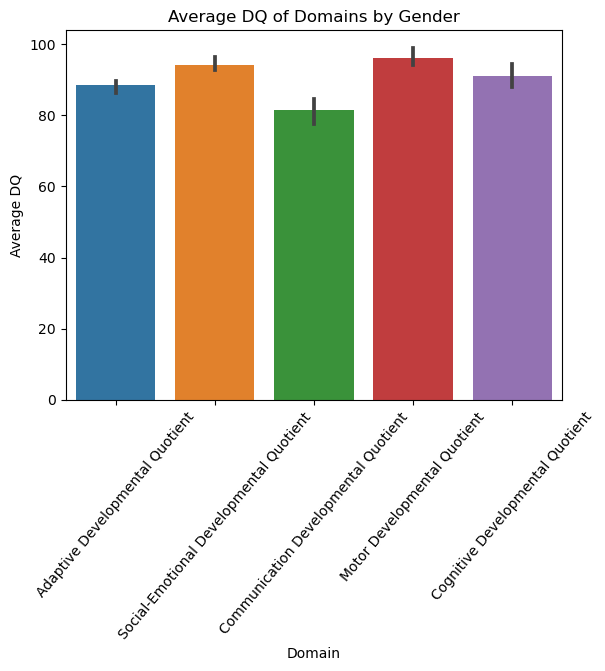

In [22]:
sns.barplot(data=average_df)
plt.title('Average DQ of Domains by Gender')
plt.ylabel('Average DQ')
plt.xlabel('Domain')
plt.xticks(rotation = 50)
#plt.savefig('tripsbyday.png')

In [ ]:
Next our group divided up the domains per person to dig into the subdomains and get the averages, I was chosen to do motor. 

In [35]:
motor_subdomain_df=teis_df[['Child ID','Gender', 'Motor-Gross Motor SS','Motor-Fine Motor SS','Motor-Perceptual Motor SS']]
#motor_subdomain_df.fillna("N/A",inplace=True)
motor_subdomain_df

,Child ID,Gender,Motor-Gross Motor SS,Motor-Fine Motor SS,Motor-Perceptual Motor SS
0,44879,F,7.0,9.0,NaN
1,47795,F,7.0,13.0,11.0
2,54340,M,11.0,12.0,NaN
3,54344,F,5.0,12.0,NaN
4,54515,M,3.0,8.0,NaN
...,...,...,...,...,...
23942,SP03287,F,11.0,15.0,NaN
23943,SP03288,F,15.0,11.0,12.0
23944,SP03289,F,11.0,10.0,11.0
23945,SP03290,M,9.0,10.0,11.0


Commented out the second line in the cell above. I wanted to turn the NaN values to return something cleaner like N/A, but this was interfering with my ability to take the averages of each column as you will find below. 

In [ ]:
Next, I am gathering all of the averages for each subdomain

In [42]:
motor_grossmotor_avg = motor_subdomain_df.groupby('Gender')['Motor-Gross Motor SS'].agg(np.mean).to_frame()
motor_grossmotor_avg

,Motor-Gross Motor SS
Gender,
F,8.370319
M,8.765144
U,8.969388


In [37]:
motor_finemotor_avg = motor_subdomain_df.groupby('Gender')['Motor-Fine Motor SS'].agg(np.mean).to_frame()
motor_finemotor_avg

,Motor-Fine Motor SS
Gender,
F,10.124637
M,9.555983
U,10.629252


In [46]:
motor_perceptmotor_avg = motor_subdomain_df.groupby('Gender')['Motor-Perceptual Motor SS'].agg(np.mean).to_frame()
motor_perceptmotor_avg

,Motor-Perceptual Motor SS
Gender,
F,8.877836
M,8.336237
U,10.146497


In [47]:
motor_sub_avg= motor_grossmotor_avg.merge(motor_finemotor_avg, how='outer', on='Gender')
motor_sub_avg= motor_sub_avg.merge(motor_perceptmotor_avg, how='outer', on='Gender')
motor_sub_avg

,Motor-Gross Motor SS,Motor-Fine Motor SS,Motor-Perceptual Motor SS
Gender,,,
F,8.370319,10.124637,8.877836
M,8.765144,9.555983,8.336237
U,8.969388,10.629252,10.146497
